In [86]:
from pandas_datareader import data as pdr
import pandas as pd
import mplfinance as mpf
import yfinance as yf
yf.pdr_override()

In [87]:
start = '2020-01-01' 
end = '2021-01-01'

In [88]:
data = pdr.get_data_yahoo("AAPL", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [89]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337982,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269142,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852974,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505638,108872000
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.161407,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043640,121047300


In [90]:
def macd_func(df,a,b,c):
    EMA_Short = df['Close'].ewm(span=a, adjust=False,min_periods=a+1).mean()
    EMA_Long = df['Close'].ewm(span=b, adjust=False,min_periods=b+1).mean()
    MACD = EMA_Short - EMA_Long
    Signal = MACD.ewm(span=c, adjust=False,min_periods=c+1).mean()
    df['macd'] = MACD
    df['Signal_Line'] = Signal
    df['Histogram'] = df['macd'] - df['Signal_Line']
    df['Shift_His'] = df['Histogram'].shift(1)
    df[(df['Histogram']>0)&(df['Shift_His']<0)]
    df.loc[(df['Histogram']>0)&(df['Shift_His']<0), 'action'] = 'buy'
    df.loc[(df['Histogram']<0)&(df['Shift_His']>0), 'action'] = 'sell'
    df.loc[df['action'] == 'buy', 'marker_position'] = df['Low']*0.98
    df.loc[df['action'] == 'sell', 'marker_position'] = df['High']*1.02
    return df



In [91]:
APPLE_MACD = macd_func(data,12,26,9)

In [92]:
APPLE_MACD

,Open,High,Low,Close,Adj Close,Volume,macd,Signal_Line,Histogram,Shift_His,action,marker_position
Date,,,,,,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337982,100805600,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988472,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269142,146322800,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852974,118387200,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505638,108872000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.161407,54930100,3.323474,2.665410,0.658064,0.653624,NaN,NaN
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200,3.794496,2.891227,0.903269,0.658064,NaN,NaN
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043640,121047300,3.975103,3.108002,0.867101,0.903269,NaN,NaN


In [93]:
APPLE_MACD[APPLE_MACD['action']=='sell']

,Open,High,Low,Close,Adj Close,Volume,macd,Signal_Line,Histogram,Shift_His,action,marker_position
Date,,,,,,,,,,,,
2020-05-27,79.035004,79.677498,78.272499,79.527496,78.762100,112945200,2.505659,2.531929,-0.026270,0.029450,sell,81.271048
2020-06-29,88.312500,90.542503,87.820000,90.445000,89.574516,130646000,3.115261,3.146689,-0.031428,0.009536,sell,92.353353
2020-07-17,96.987503,97.147499,95.839996,96.327499,95.400398,92186800,3.320542,3.346937,-0.026394,0.086410,sell,99.090449
2020-07-21,99.172501,99.250000,96.742500,97.000000,96.066437,103433200,3.228542,3.323922,-0.095380,0.003322,sell,101.235000
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.932449,257599600,6.624984,6.841405,-0.216421,0.616050,sell,131.416796
2020-10-21,116.669998,118.709999,116.449997,116.870003,115.953896,89946000,1.050432,1.068023,-0.017591,0.142827,sell,121.084199
2020-11-23,117.180000,117.620003,113.750000,113.849998,113.152443,127959300,0.488706,0.651288,-0.162583,0.178203,sell,119.972403


In [94]:
def macd_plot(df_plot):
    df = macd_func(df_plot,12,26,9)
    #plot macd line and signal line
    mpf_macd = mpf.make_addplot(df['macd'],panel=1,color='blue',title='MACD')
    mpf_signal = mpf.make_addplot(df['Signal_Line'],panel=1,color='orange')
    
    colors = ['green' if value >=0 else 'red' for value in df['Histogram']]
    mpf_histogram = mpf.make_addplot(df['Histogram'],type='bar',panel=1,color=colors)
    
    #marker
    markers = ['^' if x == 'buy' else 'v' for x in df['action']]
    color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
    plot_signal = mpf.make_addplot(df['marker_position'],type='scatter',markersize=30,marker=markers,color=color_marker)
    
    plots = [mpf_macd,mpf_signal,mpf_histogram,plot_signal]
    return plots


In [95]:
x = macd_plot(data)

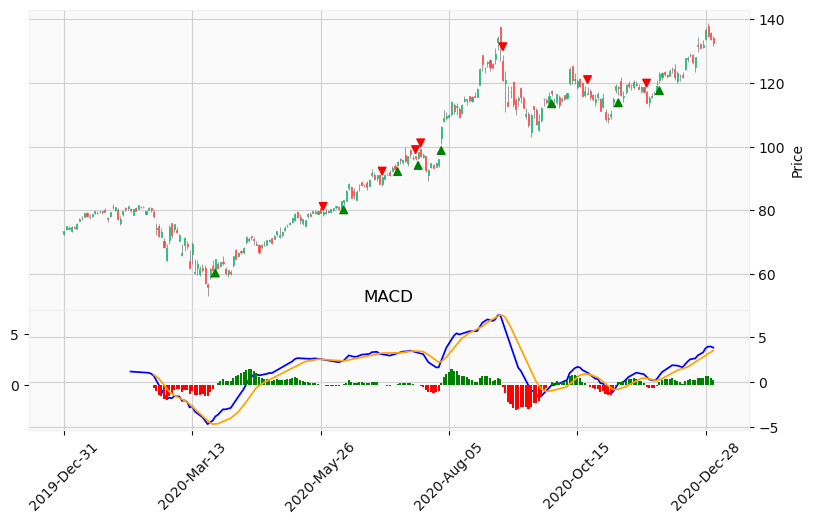

In [96]:
mpf.plot(data,type='candle',style='yahoo',addplot=x,figsize=(10,6))

In [97]:
#backtest
test = data.copy()
test.head(5)

,Open,High,Low,Close,Adj Close,Volume,macd,Signal_Line,Histogram,Shift_His,action,marker_position
Date,,,,,,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337982,100805600,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988472,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269142,146322800,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852974,118387200,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505638,108872000,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
test['action_price'] = test['Open'].shift(-1)

In [99]:
test.head(5)

,Open,High,Low,Close,Adj Close,Volume,macd,Signal_Line,Histogram,Shift_His,action,marker_position,action_price
Date,,,,,,,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337982,100805600,NaN,NaN,NaN,NaN,NaN,NaN,74.059998
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988472,135480400,NaN,NaN,NaN,NaN,NaN,NaN,74.287498
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269142,146322800,NaN,NaN,NaN,NaN,NaN,NaN,73.447502
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852974,118387200,NaN,NaN,NaN,NaN,NaN,NaN,74.959999
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505638,108872000,NaN,NaN,NaN,NaN,NaN,NaN,74.290001


In [100]:
test_record = test[test.action.notnull()]
test_record['return'] = test_record['action_price'].pct_change(1)
test_record.head(5)

<ipython-input-100-e35326a7e618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['return'] = test_record['action_price'].pct_change(1)


,Open,High,Low,Close,Adj Close,Volume,macd,Signal_Line,Histogram,Shift_His,action,marker_position,action_price,return
Date,,,,,,,,,,,,,,
2020-03-26,61.630001,64.669998,61.590000,64.610001,63.815422,252087200,-3.861647,-3.872910,0.011263,-0.442737,buy,60.358200,63.187500,NaN
2020-05-27,79.035004,79.677498,78.272499,79.527496,78.762100,112945200,2.505659,2.531929,-0.026270,0.029450,sell,81.271048,79.192497,0.253294
2020-06-08,82.562500,83.400002,81.830002,83.364998,82.562653,95654400,2.398883,2.360130,0.038753,-0.036989,buy,80.193402,83.035004,0.048521
2020-06-29,88.312500,90.542503,87.820000,90.445000,89.574516,130646000,3.115261,3.146689,-0.031428,0.009536,sell,92.353353,90.019997,0.084121
2020-07-08,94.180000,95.375000,94.089996,95.342499,94.424889,117092000,3.227069,3.109287,0.117782,-0.004769,buy,92.208196,96.262497,0.069346


In [101]:
test_record.reset_index(inplace=True)
test_record.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'macd',
       'Signal_Line', 'Histogram', 'Shift_His', 'action', 'marker_position',
       'action_price', 'return'],
      dtype='object')

In [102]:
test_record['previous_signal_date'] = test_record['Date'].shift(1)
test_record['previous_action'] = test_record['action'].shift(1)
test_record['previous_action_price'] = test_record['action_price'].shift(1)
test_record.rename(columns={'Date':'today_signal_date'},inplace=True)

test_record.head(5)

<ipython-input-102-dcce0d097f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['previous_signal_date'] = test_record['Date'].shift(1)
<ipython-input-102-dcce0d097f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['previous_action'] = test_record['action'].shift(1)
<ipython-input-102-dcce0d097f9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,today_signal_date,Open,High,Low,Close,Adj Close,Volume,macd,Signal_Line,Histogram,Shift_His,action,marker_position,action_price,return,previous_signal_date,previous_action,previous_action_price
0,2020-03-26,61.630001,64.669998,61.590000,64.610001,63.815422,252087200,-3.861647,-3.872910,0.011263,-0.442737,buy,60.358200,63.187500,NaN,NaT,NaN,NaN
1,2020-05-27,79.035004,79.677498,78.272499,79.527496,78.762100,112945200,2.505659,2.531929,-0.026270,0.029450,sell,81.271048,79.192497,0.253294,2020-03-26,buy,63.187500
2,2020-06-08,82.562500,83.400002,81.830002,83.364998,82.562653,95654400,2.398883,2.360130,0.038753,-0.036989,buy,80.193402,83.035004,0.048521,2020-05-27,sell,79.192497
3,2020-06-29,88.312500,90.542503,87.820000,90.445000,89.574516,130646000,3.115261,3.146689,-0.031428,0.009536,sell,92.353353,90.019997,0.084121,2020-06-08,buy,83.035004
4,2020-07-08,94.180000,95.375000,94.089996,95.342499,94.424889,117092000,3.227069,3.109287,0.117782,-0.004769,buy,92.208196,96.262497,0.069346,2020-06-29,sell,90.019997


In [103]:
test_record = test_record[['action','today_signal_date','action_price','return','previous_signal_date','previous_action','previous_action_price']]

In [104]:
profit = test_record[test_record.action == 'sell']

In [105]:
profit

,action,today_signal_date,action_price,return,previous_signal_date,previous_action,previous_action_price
1,sell,2020-05-27,79.192497,0.253294,2020-03-26,buy,63.187500
3,sell,2020-06-29,90.019997,0.084121,2020-06-08,buy,83.035004
5,sell,2020-07-17,96.417503,0.001610,2020-07-08,buy,96.262497
7,sell,2020-07-21,96.692497,-0.025007,2020-07-20,buy,99.172501
9,sell,2020-09-03,120.070000,0.109704,2020-07-31,buy,108.199997
11,sell,2020-10-21,117.449997,0.040393,2020-10-01,buy,112.889999
13,sell,2020-11-23,113.910004,-0.054689,2020-11-06,buy,120.500000
